This tutorial shows how to use some of the web service calls directly to retrieve a list of observation networks, the wells belonging to that network, and water level measurements for those wells.

In [1]:
import sa_gwdata

In [2]:
session = sa_gwdata.WaterConnectSession()

When the session is started a query is run which downloads some lists:

In [3]:
session.networks

{'AW_NP': 'Alinytjara Wilurara Non-Prescribed Area',
 'ANGBRM': 'Angas Bremer PWA',
 'BAROOTA': 'Baroota PWRA',
 'BAROSS_IRR': 'Barossa irrigation wells salinity monitoring',
 'BAROSSA': 'Barossa PWRA',
 'BERI_REN': 'Berri and Renmark Irrigation Areas',
 'BOT_GDNS': 'Botanic Gardens wetlands',
 'CENT_ADEL': 'Central Adelaide PWA',
 'CHOWILLA': 'Chowilla Floodplain',
 'CLARE': 'Clare PWRA',
 'EMLR': 'Eastern Mount Lofty Ranges PWRA',
 'EP_GDE': 'EPNRM Groundwater Dependent Ecosystem wells',
 'EP_NP': 'Eyre Peninsula Non-Prescribed Area',
 'FAR NORTH': 'Far North PWA',
 'GFLOWS_S3W': 'GFLOWS pumping test wells',
 'GG_EIZ': 'Golden Grove extractive indust zone',
 'KANGFLAT': 'Kangaroo Flat irrigation wells salinity monitoring',
 'KI_NP': 'Kangaroo Island Non-Prescribed Area',
 'KAT_FP': 'Katarapko Floodplain',
 'KAT_FP_INJ': 'Katarapko Floodplain Injection',
 'LEIGHCK': 'Leigh Creek',
 'LLC_NTH': 'Lower Limestone Coast PWA_North',
 'LLC_STH': 'Lower Limestone Coast PWA_South',
 'LOXTON': 

Find wells in an observation network

In [4]:
r = session.get("GetObswellNetworkData", params={"Network": "CENT_ADEL"})

In [5]:
r2 = session.get("GetObswellNumberSearchData", params={"OBSNUMBER": "YAT154,YAT150"})

In [6]:
session.well_cache.head()

,unit_long,obs_no,drillhole_no
0,652800254.0,PTA040,27382
1,652800309.0,PTA071,27437
2,652800315.0,PTA060,27443
3,652800376.0,PTA062,27504
4,652800441.0,YAT051,27569


Let's have a look at the first request - the Central Adelaide observation well network. An easy way to see what's in the dataframe is to use the transpose:

In [7]:
r.df.head().T

,0,1,2,3,4
aq_mon,Tomw(T2),Qhcks,Tomw(T1),Tomw(T1),Tomw(T1)
chem,Y,N,Y,Y,Y
class,WW,WW,WW,WW,WW
dhno,27382,27437,27443,27504,27569
drill_date,1968-02-07,1963-01-01,1972-04-20,1978-02-28,1975-01-01
lat,-34.7647,-34.8009,-34.8111,-34.7799,-34.8912
latest_open_date,1992-02-20,1963-01-01,2014-04-01,1978-02-28,1975-07-09
latest_open_depth,225,6.4,0,144.5,131.1
latest_sal_date,2013-09-02,1984-02-01,1991-10-09,2016-04-06,1986-11-13
latest_swl_date,2018-09-18,1986-03-05,2003-07-04,2011-09-18,1988-09-21


Download water levels for that well:

In [8]:
wl = session.get("GetWaterLevelDetails", params={"DHNO": 188444}).df
wl.describe()

,rswl,standing_water_level
count,37.000000,37.000000
mean,-7.434595,14.394595
std,5.993910,5.993910
min,-16.910000,5.610000
25%,-12.880000,9.170000
50%,-4.460000,11.420000
75%,-2.210000,19.840000
max,1.350000,23.870000


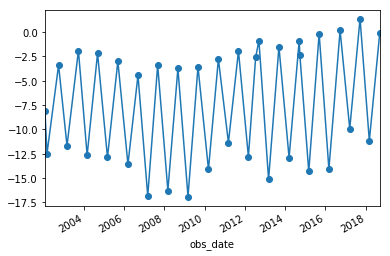

In [11]:
import pandas as pd
%matplotlib inline
wl = wl.set_index(pd.to_datetime(wl.obs_date))
wl = wl.sort_index()
wl.rswl.plot(marker="o")